In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, \
    confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegressionCV
from sklearn.svm import SVC
from sklearn.neighbors import KDTree, KNeighborsClassifier, BallTree
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.metrics import f1_score
from imblearn.over_sampling import RandomOverSampler
from sklearn.linear_model import LogisticRegression
from scipy.stats.mstats import gmean


#Comments are written by me for future use and explaniapility to the grader

#Importing data set to a pandas datafram
df = pd.read_csv("Dataset-vf.csv")

# Descriping data

# Features and samples
print("The number of features:", df.shape[1]-1)
print("The number of samples:", df.shape[0])

print("Sample of data:")
display(df.sample(20))

# Count the number of Null and Non-Null

display(df.info(), df.isna().any(), df.isnull().sum())

print("Descriptive analysis:\n")
display(df.describe(), df.describe(include=['object']))

The number of features: 15
The number of samples: 6374
Sample of data:


,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,Y
1325,3018,33.0,7,134,10,2263,219,226,143,1031,0.47,-840,FC11,CA49,NaN,Apple
1034,2206,24.0,3,0,0,787,218,233,152,324,0.12,-519,FC14,CA34,R3,Carrot
4751,2975,NaN,34,524,170,547,252,172,0,1560,0.79,830,FC11,CA50,NaN,Apple
6300,2260,24.0,28,297,100,488,192,168,99,1621,0.65,215,FC14,CA30,NaN,Berry
5281,3178,NaN,10,0,0,4286,220,217,131,3248,0.35,-494,FC11,CA49,NaN,Apple
526,3312,86.0,13,60,12,2256,239,217,107,2766,0.91,866,FC11,CA59,NaN,Peach
4986,2137,140.0,33,42,24,1060,247,210,63,408,0.74,-152,FC14,CA23,NaN,Carrot
6342,3247,36.0,4,417,20,4473,220,230,147,2223,0.92,-580,FC11,CA58,R3,Peach
4353,1944,339.0,30,240,93,210,142,181,169,815,0.11,-911,FC14,CA25,NaN,Mango
2029,3091,119.0,10,180,1,967,237,232,125,1640,0.38,-183,FC11,CA43,NaN,Apple


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6374 entries, 0 to 6373
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X1      6374 non-null   int64  
 1   X2      5747 non-null   float64
 2   X3      6374 non-null   int64  
 3   X4      6374 non-null   int64  
 4   X5      6374 non-null   int64  
 5   X6      6374 non-null   int64  
 6   X7      6374 non-null   int64  
 7   X8      6374 non-null   int64  
 8   X9      6374 non-null   int64  
 9   X10     6374 non-null   int64  
 10  X11     6374 non-null   float64
 11  X12     6374 non-null   int64  
 12  X13     6374 non-null   object 
 13  X14     6374 non-null   object 
 14  X15     631 non-null    object 
 15  Y       6374 non-null   object 
dtypes: float64(2), int64(10), object(4)
memory usage: 796.9+ KB


None

X1     False
X2      True
X3     False
X4     False
X5     False
X6     False
X7     False
X8     False
X9     False
X10    False
X11    False
X12    False
X13    False
X14    False
X15     True
Y      False
dtype: bool

X1        0
X2      627
X3        0
X4        0
X5        0
X6        0
X7        0
X8        0
X9        0
X10       0
X11       0
X12       0
X13       0
X14       0
X15    5743
Y         0
dtype: int64

Descriptive analysis:



,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12
count,6374.000000,5747.000000,6374.000000,6374.000000,6374.000000,6374.000000,6374.000000,6374.000000,6374.000000,6374.000000,6374.000000,6374.000000
mean,2635.858958,153.239603,17.059617,191.487292,47.864920,1515.537182,215.191246,218.024318,130.301224,1425.017728,0.494167,6.786476
std,394.715236,105.619123,9.008995,177.839135,57.640187,1281.423405,31.643570,23.850334,49.012495,1109.522425,0.291627,573.926918
min,1863.000000,0.000000,0.000000,0.000000,-134.000000,0.000000,0.000000,99.000000,0.000000,30.000000,0.000000,-1000.000000
25%,2282.000000,69.000000,10.000000,42.000000,2.000000,624.000000,200.000000,206.000000,98.000000,663.000000,0.240000,-492.000000
50%,2686.000000,123.000000,16.000000,150.000000,28.000000,1150.000000,223.000000,222.000000,135.000000,1168.000000,0.490000,21.500000
75%,2919.000000,242.000000,24.000000,295.000000,78.000000,1959.000000,238.750000,235.000000,165.000000,1852.000000,0.750000,495.750000
max,3675.000000,360.000000,52.000000,1129.000000,334.000000,6890.000000,254.000000,254.000000,248.000000,6853.000000,1.000000,1000.000000


,X13,X14,X15,Y
count,6374,6374,631,6374
unique,4,32,4,7
top,FC14,CA30,R3,Carrot
freq,2692,720,241,1620


In [25]:
# Correlation analysis
def x(x):
    x= abs(x)
    if x> 0.9:
        return "Very_Strong"
    elif x > 0.7:
        return "Strong"
    elif x > 0.5:
        return "Moderate"
    elif x > 0.3:
        return "Weak"
    else:
        return "Very_Weak"
        

df.corr().applymap(x)

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12
X1,Very_Strong,Very_Weak,Weak,Weak,Very_Weak,Moderate,Very_Weak,Very_Weak,Very_Weak,Weak,Very_Weak,Very_Weak
X2,Very_Weak,Very_Strong,Very_Weak,Very_Weak,Very_Weak,Very_Weak,Moderate,Weak,Moderate,Very_Weak,Very_Weak,Very_Weak
X3,Weak,Very_Weak,Very_Strong,Very_Weak,Weak,Weak,Very_Weak,Moderate,Weak,Very_Weak,Very_Weak,Very_Weak
X4,Weak,Very_Weak,Very_Weak,Very_Strong,Moderate,Very_Weak,Very_Weak,Very_Weak,Very_Weak,Very_Weak,Very_Weak,Very_Weak
X5,Very_Weak,Very_Weak,Weak,Moderate,Very_Strong,Very_Weak,Very_Weak,Very_Weak,Very_Weak,Very_Weak,Very_Weak,Very_Weak
X6,Moderate,Very_Weak,Weak,Very_Weak,Very_Weak,Very_Strong,Very_Weak,Very_Weak,Very_Weak,Weak,Very_Weak,Very_Weak
X7,Very_Weak,Moderate,Very_Weak,Very_Weak,Very_Weak,Very_Weak,Very_Strong,Very_Weak,Strong,Very_Weak,Very_Weak,Very_Weak
X8,Very_Weak,Weak,Moderate,Very_Weak,Very_Weak,Very_Weak,Very_Weak,Very_Strong,Moderate,Very_Weak,Very_Weak,Very_Weak
X9,Very_Weak,Moderate,Weak,Very_Weak,Very_Weak,Very_Weak,Strong,Moderate,Very_Strong,Very_Weak,Very_Weak,Very_Weak
X10,Weak,Very_Weak,Very_Weak,Very_Weak,Very_Weak,Weak,Very_Weak,Very_Weak,Very_Weak,Very_Strong,Very_Weak,Very_Weak


In [26]:
# Dealing with nulls

# Filling feature X2 null values with the mean
df["X2"] = df["X2"].fillna(df["X2"].mean())



# X15 null was treated in the one hot encoding now null is just a 0 for all classes 
# which is acceptiple
display(df.info(), df.describe(include=['object']))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6374 entries, 0 to 6373
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X1      6374 non-null   int64  
 1   X2      6374 non-null   float64
 2   X3      6374 non-null   int64  
 3   X4      6374 non-null   int64  
 4   X5      6374 non-null   int64  
 5   X6      6374 non-null   int64  
 6   X7      6374 non-null   int64  
 7   X8      6374 non-null   int64  
 8   X9      6374 non-null   int64  
 9   X10     6374 non-null   int64  
 10  X11     6374 non-null   float64
 11  X12     6374 non-null   int64  
 12  X13     6374 non-null   object 
 13  X14     6374 non-null   object 
 14  X15     631 non-null    object 
 15  Y       6374 non-null   object 
dtypes: float64(2), int64(10), object(4)
memory usage: 796.9+ KB


None

,X13,X14,X15,Y
count,6374,6374,631,6374
unique,4,32,4,7
top,FC14,CA30,R3,Carrot
freq,2692,720,241,1620


In [27]:
#showing unbalanced labels

print(df.Y.value_counts())



#has been dealt with before fitting :P VVV

Carrot    1620
Melon     1571
Apple     1275
Berry     1250
Peach      308
Mango      250
Orange     100
Name: Y, dtype: int64


In [28]:
# One hot encoding on features X13-X15 and Y


y= df.iloc[:, -1]
one_hot = pd.get_dummies(df.loc[:, ["X13", 'X14', 'X15'] ])
df = df.drop(["X13", "X14", "X15", 'Y'],axis = 1)
df = df.join(one_hot)
df = df.join(y)



#Validating no null values
display(df.head(), df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6374 entries, 0 to 6373
Data columns (total 53 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   X1         6374 non-null   int64  
 1   X2         6374 non-null   float64
 2   X3         6374 non-null   int64  
 3   X4         6374 non-null   int64  
 4   X5         6374 non-null   int64  
 5   X6         6374 non-null   int64  
 6   X7         6374 non-null   int64  
 7   X8         6374 non-null   int64  
 8   X9         6374 non-null   int64  
 9   X10        6374 non-null   int64  
 10  X11        6374 non-null   float64
 11  X12        6374 non-null   int64  
 12  X13_ FC11  6374 non-null   uint8  
 13  X13_ FC12  6374 non-null   uint8  
 14  X13_ FC13  6374 non-null   uint8  
 15  X13_ FC14  6374 non-null   uint8  
 16  X14_ CA21  6374 non-null   uint8  
 17  X14_ CA22  6374 non-null   uint8  
 18  X14_ CA23  6374 non-null   uint8  
 19  X14_ CA24  6374 non-null   uint8  
 20  X14_ CA2

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X14_ CA54,X14_ CA55,X14_ CA58,X14_ CA59,X14_ CA60,X15_R,X15_R1,X15_R2,X15_R3,Y
0,2709,59.0,11,120,43,150,228,217,120,2114,...,0,0,0,0,0,0,1,0,0,Melon
1,2802,54.0,7,0,0,693,224,225,136,162,...,0,0,0,0,0,0,0,0,0,Melon
2,2325,28.0,12,0,0,1260,215,213,133,162,...,0,0,0,0,0,0,0,0,0,Carrot
3,2837,112.0,8,272,16,3649,235,231,128,6221,...,0,0,0,0,0,0,0,0,0,Orange
4,2509,59.0,7,134,10,900,226,226,134,5184,...,0,0,0,0,0,0,0,0,0,Melon


None

In [29]:
# train:70 validation:15 testing:15

trainx, valx, trainy, valy = train_test_split(df.iloc[:,:-1], pd.Series.to_numpy(df.iloc[:,-1]), test_size=0.3, \
                                              random_state=777)
valx, testx, valy, testy = train_test_split(valx, valy, test_size=0.5, \
                                              random_state=777)

scaler = StandardScaler().fit(trainx)

trainx = scaler.transform(trainx)
valx = scaler.transform(valx)
testx = scaler.transform(testx)



In [7]:
#Hyper-parameter tuning

# Logistic regression
Clist = [0.01, 0.1, 1, 10, 100]
l1_ratios = [0, 0.25, 0.5, 0.75, 1]

# Elasticnet regularization including all l1 and all l2
lgr = LogisticRegressionCV(Cs=Clist, penalty="elasticnet", l1_ratios=l1_ratios, solver="saga",  max_iter=3000,random_state=777)
lgr.fit(trainx, trainy)



LogisticRegressionCV(Cs=[0.01, 0.1, 1, 10, 100],
                     l1_ratios=[0, 0.25, 0.5, 0.75, 1], max_iter=3000,
                     penalty='elasticnet', random_state=777, solver='saga')

In [8]:
#Hyper-parameter tuning (Decision Trees)

#CV-method is shared acroos classifiers
cv_method = StratifiedKFold(n_splits=5)


#DT CV

param = {
    "criterion": [ "entropy", "gini"],
             "max_depth": [5, 6, 7 ,10, 15],
             "min_samples_split": [2, 3, 4, 5, 8],
            "splitter": ["best", "random"],
            }


cv_dt = GridSearchCV(estimator=DecisionTreeClassifier(), 
                                param_grid=param, 
                                cv=cv_method,
                                verbose=1, 
                                n_jobs=-1,
                                scoring="accuracy", 
                                return_train_score=True
                                )


cv_dt.fit(trainx, trainy);

best_params_DT = cv_dt.best_params_
print(f"BETTER PERFORMANCE parameters (after tunning)\n{best_params_DT}")


best_score_DT = cv_dt.score(valx, valy)
print(f"\n\nBest score for DT model on TRAINING: {best_score_DT}")

Fitting 5 folds for each of 64 candidates, totalling 320 fits
BETTER PERFORMANCE parameters (after tunning)
{'criterion': 'entropy', 'max_depth': 10, 'min_samples_split': 2, 'splitter': 'best'}


Best score for DT model on TRAINING: 0.8734309623430963


In [9]:
#Hyper-parameter tuning (Random Forest)

params_RF = {"min_samples_split": [2, 6, 10, 13],
              "min_samples_leaf": [1, 4, 8, 10],
              "n_estimators" :[100,200,300],
              "criterion": ["gini", "entropy"]             
              }

cv_rf = GridSearchCV(estimator=RandomForestClassifier(), 
                                param_grid=params_RF, 
                                cv=cv_method,
                                verbose=1, 
                                n_jobs=2,
                                scoring="accuracy", 
                                return_train_score=True
                                )

# Fit model with train data
cv_rf.fit(trainx, trainy);


best_params_rf = cv_rf.best_params_
print(f"BETTER PERFORMANCE parameters (after tunning)\n\n{best_params_rf}")


best_score_rf = cv_rf.score(valx, valy)
print(f"\n\nBest score for the RF model on TRAINING: {best_score_rf}")


Fitting 5 folds for each of 54 candidates, totalling 270 fits
BETTER PERFORMANCE parameters (after tunning)

{'criterion': 'entropy', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}


Best score for the RF model on TRAINING: 0.9100418410041841


In [10]:
#Hyper-parameter tuning (Adabative Boosting)
from sklearn.ensemble import AdaBoostClassifier
params_ada = {
              "n_estimators" :[100,200,300],
              "learning_rate" : [0.0000001 ,0.000001 ,0.00001, 0.0001 ,0.001,]          
              }

cv_ada = GridSearchCV(estimator=AdaBoostClassifier(), 
                                param_grid=params_ada, 
                                cv=cv_method,
                                verbose=1, 
                                n_jobs=2,
                                scoring="accuracy", 
                                return_train_score=True
                                )

# Fit model with train data
cv_ada.fit(trainx, trainy);


best_params_ada = cv_ada.best_params_
print(f"BETTER PERFORMANCE parameters (after tunning)\n\n{best_params_ada}")

best_score_ada = cv_ada.score(valx, valy)
print(f"\n\nBest score for the adaboost model on TRAINING: {best_score_ada}")

Fitting 5 folds for each of 12 candidates, totalling 60 fits
BETTER PERFORMANCE parameters (after tunning)

{'learning_rate': 0.001, 'n_estimators': 100}


Best score for the adaboost model on TRAINING: 0.6673640167364017


In [11]:
#Hyper-parameter tuning (Bagging)
from sklearn.ensemble import BaggingClassifier


param = {"base_estimator__max_depth": [3,5, 8, 10],
          "base_estimator__max_features": [None, "auto"],
          'bootstrap_features': [False, True],
          'n_estimators': [50, 100, 150, 200],
}

cv_bg = GridSearchCV(BaggingClassifier(DecisionTreeClassifier()), param, cv=3, verbose=1)


# Fit model with train data
cv_bg.fit(trainx, trainy);



best_params_bg = cv_bg.best_params_
print(f"BETTER PERFORMANCE parameters (after tunning)\n\n{best_params_bg}")

best_score_bg = cv_bg.score(valx, valy)
print(f"\n\nBest score for the bagging model on TRAINING: {best_score_bg}")


Fitting 3 folds for each of 48 candidates, totalling 144 fits
BETTER PERFORMANCE parameters (after tunning)

{'base_estimator__max_depth': 10, 'base_estimator__max_features': None, 'bootstrap_features': True, 'n_estimators': 100}


Best score for the bagging model on TRAINING: 0.893305439330544


In [30]:
# Analysis
acc = accuracy_score(valy, lgr.predict(valx))
    
print(f"""Best Regularization: Elasticnet with L1 ratio={lgr.l1_ratio_} 
          and L2={1-lgr.l1_ratio_}
        \nBest C: {lgr.C_}
        \nAccuracy: {acc}""")    

Best Regularization: Elasticnet with L1 ratio=[0.5 0.5 0.5 0.5 0.5 0.5 0.5] 
          and L2=[0.5 0.5 0.5 0.5 0.5 0.5 0.5]
        
Best C: [1. 1. 1. 1. 1. 1. 1.]
        
Accuracy: 0.8389121338912134


In [31]:
from collections import Counter


#K-NN (KDtrees algorithim )
def predict(kdclf, k, trainy, valx):
    _, ind = kdclf.query(valx, k=k)
    return [Counter([trainy[j] for j in i]).most_common(1)[0][0] for i in ind]

kdclf = KDTree(trainx, leaf_size=2)
stop = False
low = 1
high = 21 
optimization = []

while stop==False:
    Ks = [i for i in range(low, high) if i%2==1]
    for k in Ks:
        predictions = predict(kdclf, k, trainy, valx)
        optimization.append((k, accuracy_score(valy.tolist(), predictions)))
    for k, acc in optimization:
        if optimization[-1][1] < acc:
            stop = True
    low = high
    high = high + 20

In [32]:
best_k = 0
best_acc_kd = 0
for k, acc in optimization:
    if acc >= best_acc_kd:
        best_acc_kd = acc
        best_k = k

Best K: 3
Accuracy: 0.8211297071129707


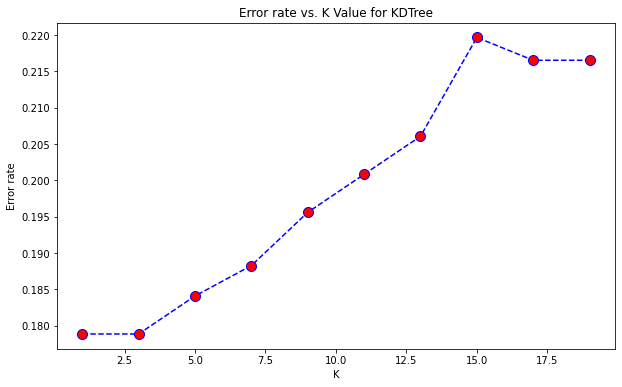

In [33]:
plt.figure(figsize=(10,6))
plt.plot([k for k, acc in optimization], [1-acc for k, acc in optimization],color='blue', linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('Error rate vs. K Value for KDTree')
plt.xlabel('K')
plt.ylabel('Error rate')
print(f"Best K: {best_k}\nAccuracy: {best_acc_kd}")

In [34]:
# merge test and val and fit 


merged_train_valx = np.vstack((trainx, valx))
merged_train_valy = np.hstack((trainy, valy))



## Dealing with unbalanced DATA using oversampling (SHOULD BE DONE AFTER cv [tunning!])
ros = RandomOverSampler(random_state=777)
merged_train_valx, merged_train_valy = ros.fit_resample(merged_train_valx, merged_train_valy)

# NOTE: Classifiers, some, can deal with unbalanced data (if provided as hyper-parameter)




#fitting
scaler.fit(merged_train_valx)
merged_train_valx = scaler.transform(merged_train_valx)
testx = scaler.transform(testx)


#logistic
lgrClf = LogisticRegression(C=lgr.C_[0], penalty="elasticnet", l1_ratio=lgr.l1_ratio_[0], solver="saga",  max_iter=3000,random_state=777)
lgrClf.fit(merged_train_valx, merged_train_valy)
predictionsLGR = lgrClf.predict(testx)


# #KNN
kdClf = KDTree(merged_train_valx, leaf_size=2)
predictionsKD = predict(kdClf, best_k, merged_train_valy, testx)



####DT
dtclf = DecisionTreeClassifier(criterion="entropy", max_depth=10, min_samples_split=2, splitter= 'best')
dtclf = dtclf.fit(merged_train_valx, merged_train_valy)
dtpred = dtclf.predict(testx)




####RF
rf_clf = RandomForestClassifier(criterion="entropy", n_estimators=200,min_samples_leaf=1, min_samples_split=2)
rf_clf = rf_clf.fit(merged_train_valx, merged_train_valy)
rfpred = rf_clf.predict(testx)



####AdaBoost
ada_clf = AdaBoostClassifier(learning_rate=0.001, n_estimators=100)
ada_clf = ada_clf.fit(merged_train_valx, merged_train_valy)
adapred = ada_clf.predict(testx)





####Bagging
bg_clf = BaggingClassifier(DecisionTreeClassifier(max_depth=10, max_features= None),n_estimators=100,
                        bootstrap_features= True)
bg_clf= bg_clf.fit(merged_train_valx, merged_train_valy)
bgpred= bg_clf.predict(testx)


In [35]:
print('TESTING')




##### DT #####
print('=' * 80)
print('\n\n-Decision Trees')


acc= accuracy_score(testy, dtpred)
f1m=f1_score(testy, dtpred, average='macro')
f1w=f1_score(testy, dtpred, average='weighted')




print('Accuracy:', acc)
print('F1 macro: ', f1m)
print('F1 weighted: ', f1w, '\n\n')




print("Classification Report")
print(classification_report(testy, dtpred))


print("Confusion Matrix:")
print(confusion_matrix(testy, dtpred))



##### RF #####
print('=' * 80)
print('\n\n-RF')

acc= accuracy_score(testy, rfpred)
f1m=f1_score(testy, rfpred, average='macro')
f1w=f1_score(testy, rfpred, average='weighted')


print('Accuracy:', acc)
print('F1 macro: ', f1m)
print('F1 weighted: ', f1w, '\n\n')


print("Classification Report")
print(classification_report(testy, rfpred))

print("Confusion Matrix:")
print(confusion_matrix(testy, rfpred))



##### AdaBoost #####
print('=' * 80)
print('\n\n-AdaBoost\n\n')



acc= accuracy_score(testy, adapred)
f1m=f1_score(testy, adapred, average='macro')
f1w=f1_score(testy, adapred, average='weighted')


print('Accuracy:', acc)
print('F1 macro: ', f1m)
print('F1 weighted: ', f1w, '\n\n')


print("Classification Report")
print(classification_report(testy, adapred))


print("Confusion Matrix:")
print(confusion_matrix(testy, adapred))




##### Bagging #####
print('=' * 80)
print('\n\n-Bagging\n\n')



acc= accuracy_score(testy, bgpred)
f1m=f1_score(testy, bgpred, average='macro')
f1w=f1_score(testy, bgpred, average='weighted')



print('Accuracy:', acc)
print('F1 macro: ', f1m)
print('F1 weighted: ', f1w, '\n\n')

print("Classification Report")
print(classification_report(testy, bgpred))


print("Confusion Matrix:")
print(confusion_matrix(testy, bgpred))

print('=' * 80)

#####
print("Accuracy of KDTree on Test: ", 
      accuracy_score(testy.tolist(), predictionsKD))
print("Confusion Matrix:")
print(confusion_matrix(testy, predictionsKD))

print('\n\n')
print('=' * 80)
print('\n\n')


print("Accuracy of logistic regression on Test: ", 
      accuracy_score(testy, predictionsLGR))

print("Confusion Matrix:")
print(confusion_matrix(testy, predictionsLGR))

TESTING


-Decision Trees
Accuracy: 0.8662486938349008
F1 macro:  0.7789166564756008
F1 weighted:  0.8706601940382491 


Classification Report
              precision    recall  f1-score   support

       Apple       0.94      0.77      0.85       215
       Berry       0.89      0.80      0.85       178
      Carrot       0.96      0.96      0.96       263
       Mango       0.40      0.79      0.54        24
       Melon       0.85      0.89      0.87       209
      Orange       0.47      0.70      0.56        10
       Peach       0.73      0.98      0.84        58

    accuracy                           0.87       957
   macro avg       0.75      0.84      0.78       957
weighted avg       0.89      0.87      0.87       957

Confusion Matrix:
[[165   1   0   0  20   8  21]
 [  0 143  11  13  11   0   0]
 [  0   5 253   5   0   0   0]
 [  0   4   0  19   1   0   0]
 [  7   7   0  10 185   0   0]
 [  2   0   0   0   1   7   0]
 [  1   0   0   0   0   0  57]]


-RF
Accuracy: 0.927899

/Users/shabibmohammed/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/shabibmohammed/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/shabibmohammed/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(r